# Housing Price Simulation.

A notebook by *List your names here*.

Then, add alternating code cells and description/markdown cells,
between this top cell and the final "Running DocTest tests" section,
to answer all the elements of the final project programming assignment.

The answer to each part must be clearly identified with,
the text "Step 1" for Step 1, "Step 2" for Step 2, etc.
As noted in the assignment, you may do some of the work in copies of this project
for different sub-experiments,
rather than just putting it all in this notebook,
if you like.

In [147]:
import numpy as np
import doctest
import matplotlib.pyplot as plt
import pandas as pd

## Data Generation

In [148]:
def gen_data(n, y_min, alpha, mu, c, seed=1):

  # Validate parameters
    if y_min <= c:
        raise ValueError("y_min needs to be greater than c")
    if alpha <= 1:
        raise ValueError("alpha neds to be greater than 1")
    if mu <= 0:
        raise ValueError("mu needs to be positive")

    U = np.random.uniform(size=n)
    y = y_min * (1 - U) ** (-1.0 / alpha)

    U_exp = np.random.uniform(size=n)
    d = -mu * np.log(U_exp)

    y = np.sort(y)
    d = np.sort(d)
    return y, d


## Data Gen Validation

Income: [  80.02026887   80.02626533   80.05393104 ... 1610.29342751 1894.90152135
 1995.66803151]
Housing Distance: [2.16454146e-03 3.83093253e-03 1.16839405e-02 ... 6.54269925e+01
 6.91017398e+01 6.96036702e+01]


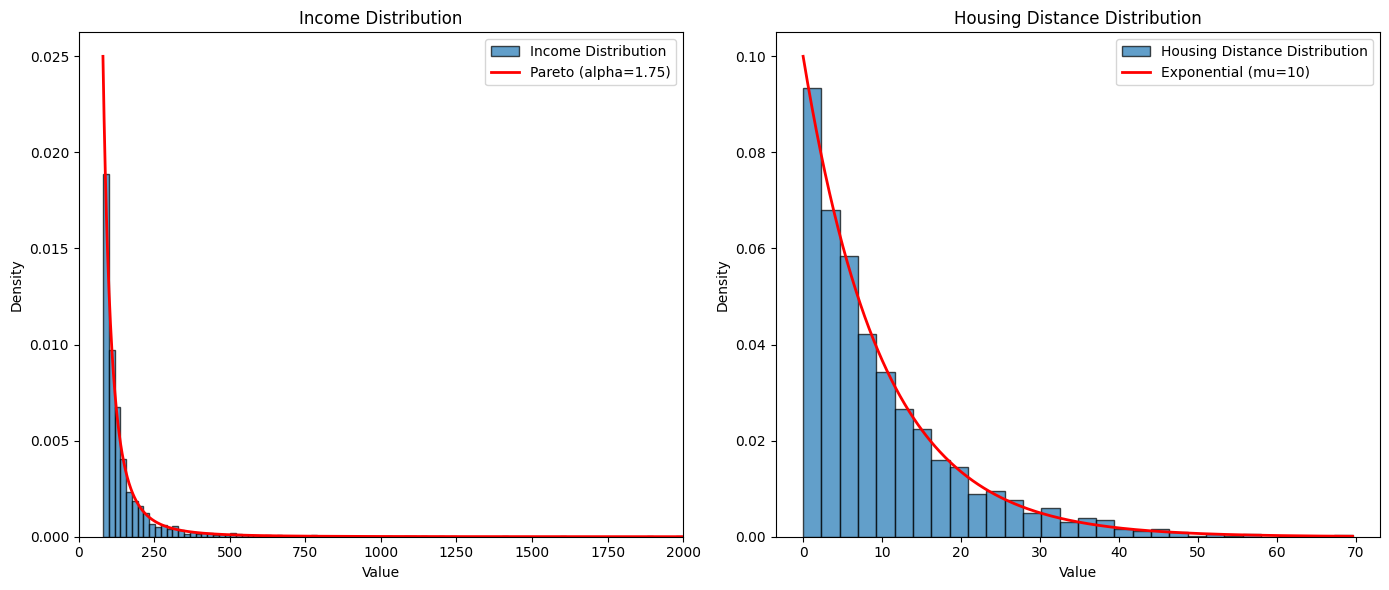

In [ ]:

# PLOT DISTRIBUTIONS 

def plot_distributions()
# check to see if they look pareto and exp

plt.figure(figsize=(14, 6))  

# Income Distribution
plt.subplot(1, 2, 1)
plt.hist(y_samples, bins=100, density=True, alpha=0.7, edgecolor="black", label="Income Distribution")
plt.title("Income Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.xlim(0, xlim) 

# Add Pareto line
pareto_x = np.linspace(y_min_test, xlim, xlim)
pareto_pdf = (alpha_test * y_min_test**alpha_test) / (pareto_x ** (alpha_test + 1))
plt.plot(pareto_x, pareto_pdf, 'r-', lw=2, label="Pareto (alpha=1.75)")
plt.legend()

# Housing Distance Distribution
plt.subplot(1, 2, 2)
plt.hist(d_samples, bins=30, density=True, alpha=0.7, edgecolor="black", label="Housing Distance Distribution")
plt.title("Housing Distance Distribution")
plt.xlabel("Value")
plt.ylabel("Density")

# Add Exponential line
exp_x = np.linspace(0, d_samples.max(), 500)
exp_pdf = (1 / mu_test) * np.exp(-exp_x / mu_test)
plt.plot(exp_x, exp_pdf, 'r-', lw=2, label="Exponential (mu=10)")
plt.legend()

plt.tight_layout()
plt.show()


# Generate samples for visualization
n_test = 2000
y_min_test = 80
alpha_test = 2
mu_test = 10
c_test = 50
seed = 1

xlim = 2000 # for readability

y_samples, d_samples = gen_data(n_test, y_min_test, alpha_test, mu_test, c_test, 1)
print(f'Income: {y_samples}')
print(f'Housing Distance: {d_samples}')



## Visualization and Statistics

In [150]:
def compute_statistics(prices):
    average = np.mean(prices)
    median = np.median(prices)
    Q1 = np.percentile(prices, 25)
    Q3 = np.percentile(prices, 75)
    IQR = Q3 - Q1

    statistics = {
        'average': average,
        'median': median,
        'Q1' : Q1,
        'Q3' : Q3,
        'IQR': IQR
    }

    return statistics


def plot_house_prices(y, prices):
    n = len(y)
    income_quantiles = np.linspace(0, 1, n)

    plt.figure(figsize=(12, 6))
    plt.scatter(income_quantiles, prices, s=10, alpha=0.5, color='b')
    plt.xlabel('Income Quantile (0 = Lowest Income, 1 = Highest Income)')
    plt.ylabel('House Price')
    plt.title('House Prices vs. Income Quantile')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


def plot_percentage_income_spent(y, prices):
    n = len(y)
    income_quantiles = np.linspace(0, 1, n)
    with np.errstate(divide='ignore', invalid='ignore'):
        percentage_spent = np.where(y != 0, (prices / y) * 100, 0)

    plt.figure(figsize=(10, 6))
    plt.plot(income_quantiles, percentage_spent, marker='s', linestyle='--', color='r')
    plt.xlabel('Income Quantile (0 = Lowest Income, 1 = Highest Income)')
    plt.ylabel('Percentage of Income Spent on Housing (%)')
    plt.title('Percentage of Income Spent on Housing vs. Income Quantile')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#plot_house_prices(y, prices)
#plot_percentage_income_spent(y, prices)
#print(compute_statistics(prices))

## 2a

In [151]:
def equilibrium_price_recursive(n, c, y, d, j):

    if j < 0 or j >= n:
        raise ValueError(f"Invalid j: {j}. It should be between 0 and {n-1}.")

    if j == 0:
        return c  # Base case: first house price is equal to c

    theta_j = np.exp(-(d[j] - d[j - 1]))
    # Recursive call for the previous house (j-1)
    previous_price = equilibrium_price_recursive(n, c, y, d, j - 1)
    equilibrium_price = theta_j * previous_price + (1 - theta_j) * y[j]
    return equilibrium_price

def calc_prices_recursive(n, c, y, d):
    prices = []
    for j in range(n):
        prices.append(equilibrium_price_recursive(n, c, y, d, j))
    return np.array(prices)


In [152]:
def calc_prices_iterative(n, c, y, d):
    prices = np.zeros(n)
    prices[0] = c  # Base case
    
    # Calculate prices iteratively
    for j in range(1, n):
        theta_j = np.exp(-(d[j] - d[j-1]))
        prices[j] = theta_j * prices[j-1] + (1 - theta_j) * y[j]
    
    return prices


In [153]:
import numpy as np

def equillibrium_price_memo(n, c, y, d, j, memo=None):
    # Initialize memo array if not provided
    if memo is None:
        memo = np.full(n, np.nan)
    
    # Input validation
    if j < 0 or j >= n:
        raise ValueError(f"Invalid j: {j}. It should be between 0 and {n-1}.")
    
    # Check if value is already memoized
    if not np.isnan(memo[j]):
        return memo[j]
    
    # Base case: first house price
    if j == 0:
        memo[0] = c
        return c
    
    # Calculate theta_j
    theta_j = np.exp(-(d[j] - d[j - 1]))
    
    # Recursive call for previous house with memoization
    previous_price = equillibrium_price_memo(n, c, y, d, j - 1, memo)
    
    # Calculate and memoize current price
    equilibrium_price = theta_j * previous_price + (1 - theta_j) * y[j]
    memo[j] = equilibrium_price
    
    return equilibrium_price

def calc_price_memo(n, c, y, d):
    # Initialize memo array for the entire calculation
    memo = np.full(n, np.nan)
    prices = []
    for j in range(n):
        prices.append(equillibrium_price_memo(n, c, y, d, j, memo))
    return np.array(prices)

## 4a

   y_min     average      median          Q1          Q3         IQR
0     80  165.492372  115.644893   88.155400  167.364845   79.209445
1    100  218.256277  139.692201  108.389682  213.990390  105.600707
2    150  315.768457  211.037761  161.857767  311.718758  149.860990


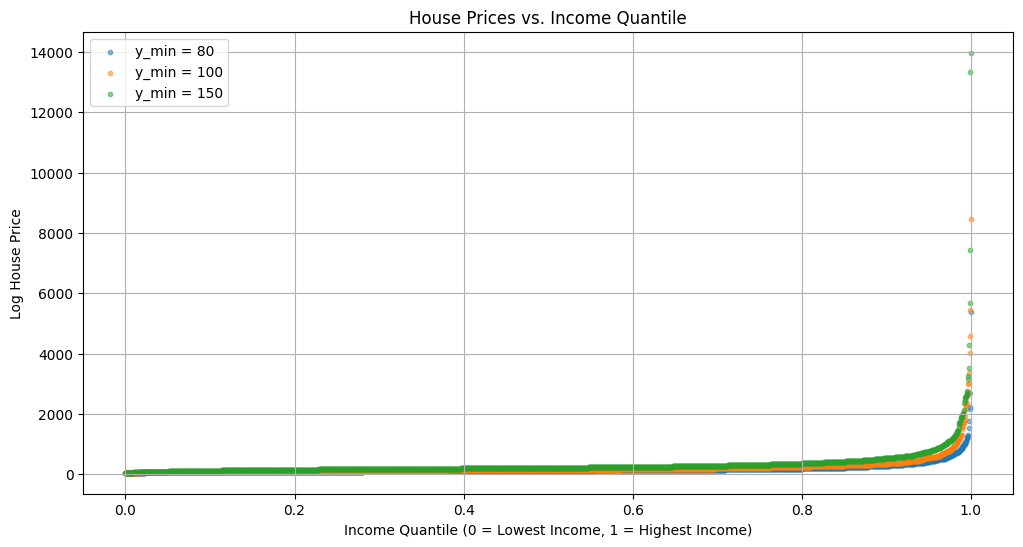

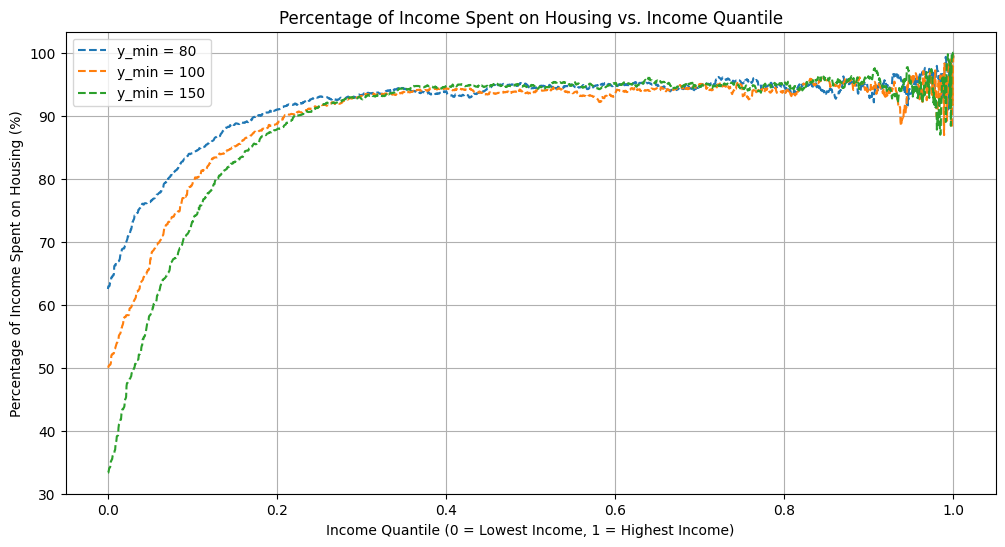

In [154]:
n = 2000
y_min_list = [80, 100, 150]
alpha = 1.75
mu = 10
c = 50
seed = 1

stats_list = []  # Store stats for table
all_y = []        # Store income data
all_prices = []   # Store prices

# Iterate over each y_min value
for y_min in y_min_list:
    y, d = gen_data(n, y_min, alpha, mu, c)
    prices = calc_prices_iterative(n, c, y, d)
   
    # Store the data
    all_y.append(y)
    all_prices.append(prices)
    
    # Compute statistics
    stats = compute_statistics(prices)
    stats['y_min'] = y_min  
    stats_list.append(stats)
    
    # Test base case
   # base_case_price = prices[0]  # This is the price of house j=1
   # if base_case_price == c:
   #     base_case_result = f"Base Case check passed: {base_case_price}"
  #  else:
   #     base_case_result = f"Base Case check failed: {base_case_price}"

stats_df = pd.DataFrame(stats_list)
stats_df = stats_df[['y_min', 'average', 'median', 'Q1', 'Q3', 'IQR']]
print(stats_df)


# Create plots after the loop
income_quantiles = np.linspace(0, 1, n)

# First plot: House Prices vs Income Quantile
plt.figure(figsize=(12, 6))
for i, (prices, y_min) in enumerate(zip(all_prices, y_min_list)):
    plt.scatter(income_quantiles, prices, s=10, alpha=0.5, label=f'y_min = {y_min}')

plt.xlabel('Income Quantile (0 = Lowest Income, 1 = Highest Income)')
plt.ylabel('Log House Price')
plt.title('House Prices vs. Income Quantile')
plt.grid(True)
plt.legend()
plt.show()

# Second plot: Percentage of Income Spent
plt.figure(figsize=(12, 6))
for i, (y, prices, y_min) in enumerate(zip(all_y, all_prices, y_min_list)):
    percentage_spent = np.where(y != 0, (prices / y) * 100, 0)
    plt.plot(income_quantiles, percentage_spent, linestyle='--', label=f'y_min = {y_min}')

plt.xlabel('Income Quantile (0 = Lowest Income, 1 = Highest Income)')
plt.ylabel('Percentage of Income Spent on Housing (%)')
plt.title('Percentage of Income Spent on Housing vs. Income Quantile')
plt.grid(True)
plt.legend()
plt.show()


### 4b

### 4b

   alpha     average      median         Q1          Q3         IQR
0   1.25  313.014589  128.392350  92.156500  229.640849  137.484348
1   1.75  175.729035  111.013049  87.521274  165.628476   78.107202
2   3.00  110.103070   96.339301  83.119011  120.286502   37.167491


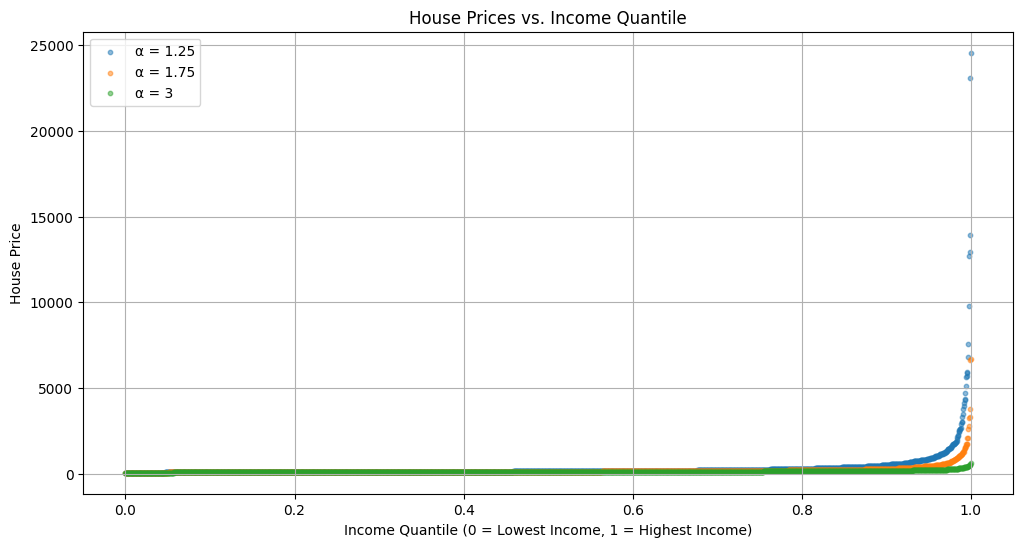

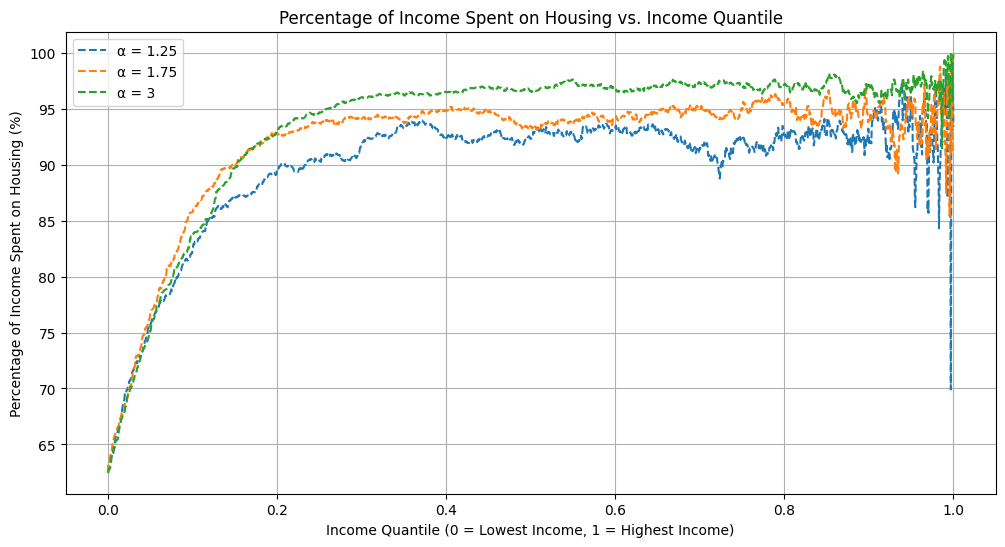

In [155]:
n = 2000
alpha_list = [1.25, 1.75, 3]
y_min = 80
mu = 10
c = 50
seed = 1

stats_list = []  # Store stats for table
all_y = []        # Store income data
all_prices = []   # Store prices

# Iterate over each alpha
for alpha in alpha_list:

    y, d = gen_data(n, y_min, alpha, mu, c)
    prices = calc_prices_iterative(n, c, y, d)
    
    # Store the data
    all_y.append(y)
    all_prices.append(prices)
    
    # Compute statistics
    stats = compute_statistics(prices)
    stats['alpha'] = alpha  
    stats_list.append(stats)

# df for table
stats_df = pd.DataFrame(stats_list)
stats_df = stats_df[['alpha', 'average', 'median', 'Q1', 'Q3', 'IQR']]  # Fixed: Use list for column selection
print(stats_df)

# Create plots after the loop
income_quantiles = np.linspace(0, 1, n)

# First plot: House Prices vs Income Quantile
plt.figure(figsize=(12, 6))
for i, (prices, alpha) in enumerate(zip(all_prices, alpha_list)):
    plt.scatter(income_quantiles, prices, s=10, alpha=0.5, label=f'α = {alpha}')  # Fixed: Label shows alpha instead of y_min
plt.xlabel('Income Quantile (0 = Lowest Income, 1 = Highest Income)')
plt.ylabel('House Price')
plt.title('House Prices vs. Income Quantile')
plt.grid(True)
plt.legend()
plt.show()

# Second plot: Percentage of Income Spent
plt.figure(figsize=(12, 6))
for i, (y, prices, alpha) in enumerate(zip(all_y, all_prices, alpha_list)):
    percentage_spent = np.where(y != 0, (prices / y) * 100, 0)
    plt.plot(income_quantiles, percentage_spent, linestyle='--', label=f'α = {alpha}')  # Fixed: Label shows alpha
plt.xlabel('Income Quantile (0 = Lowest Income, 1 = Highest Income)')
plt.ylabel('Percentage of Income Spent on Housing (%)')
plt.title('Percentage of Income Spent on Housing vs. Income Quantile')
plt.grid(True)
plt.legend()
plt.show()

### 4c

   mu     average      median         Q1          Q3        IQR
0   5  155.401078  108.264969  79.193675  161.771967  82.578292
1  10  161.099534  111.278477  88.046598  162.890348  74.843750
2  20  168.362497  116.296154  91.262603  164.958239  73.695636


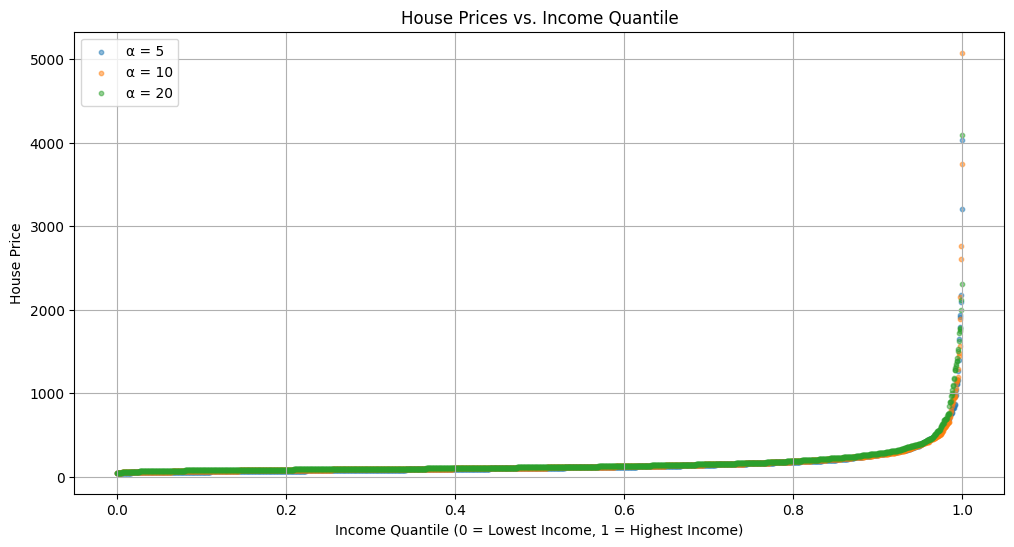

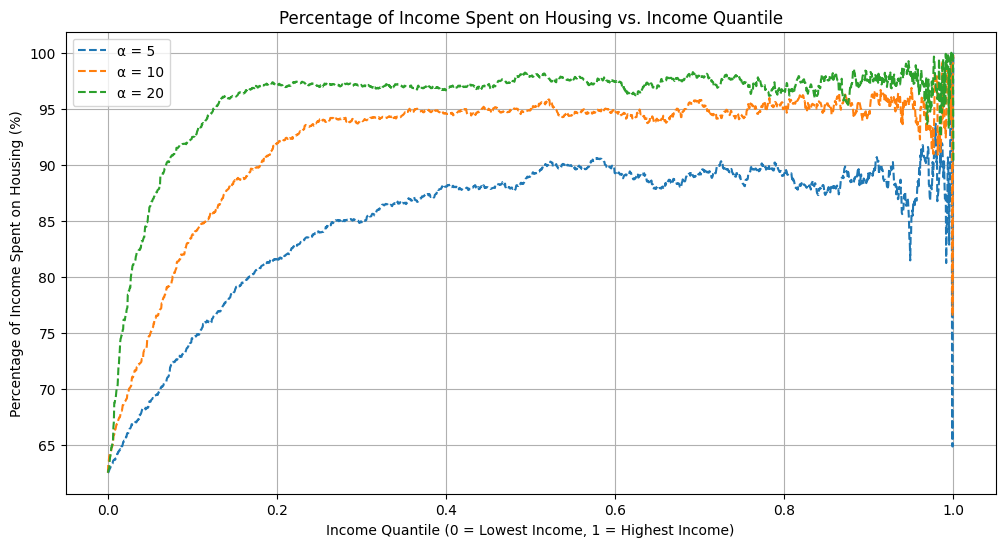

In [156]:
n = 2000
mu_list = [5,10,20]
y_min = 80
alpha = 1.75
c = 50
seed = 1

# Initialize lists to collect statistics and data
stats_list = []
all_y = []  # Store income data
all_prices = []  # Store price data

# Iterate over each alpha
for mu in mu_list:

    y, d = gen_data(n, y_min, alpha, mu, c)
    prices = calc_prices_iterative(n, c, y, d)
    
    # Store the data
    all_y.append(y)
    all_prices.append(prices)
    
    # Compute statistics
    stats = compute_statistics(prices)
    stats['mu'] = mu  
    stats_list.append(stats)

# df for table
stats_df = pd.DataFrame(stats_list)
stats_df = stats_df[['mu', 'average', 'median', 'Q1', 'Q3', 'IQR']]  # Fixed: Use list for column selection
print(stats_df)

# Create plots after the loop
income_quantiles = np.linspace(0, 1, n)

# First plot: House Prices vs Income Quantile
plt.figure(figsize=(12, 6))
for i, (prices, mu) in enumerate(zip(all_prices, mu_list)):
    plt.scatter(income_quantiles, prices, s=10, alpha=0.5, label=f'α = {mu}')  # Fixed: Label shows alpha instead of y_min
plt.xlabel('Income Quantile (0 = Lowest Income, 1 = Highest Income)')
plt.ylabel('House Price')
plt.title('House Prices vs. Income Quantile')
plt.grid(True)
plt.legend()
plt.show()

# Second plot: Percentage of Income Spent
plt.figure(figsize=(12, 6))
for i, (y, prices, mu) in enumerate(zip(all_y, all_prices, mu_list)):
    percentage_spent = np.where(y != 0, (prices / y) * 100, 0)
    plt.plot(income_quantiles, percentage_spent, linestyle='--', label=f'α = {mu}')  # Fixed: Label shows alpha
plt.xlabel('Income Quantile (0 = Lowest Income, 1 = Highest Income)')
plt.ylabel('Percentage of Income Spent on Housing (%)')
plt.title('Percentage of Income Spent on Housing vs. Income Quantile')
plt.grid(True)
plt.legend()
plt.show()

      n     average      median         Q1          Q3        IQR
0  2000  173.653335  112.276378  88.151392  165.424339  77.272947
1  4000  177.822021  113.003930  87.259419  171.292112  84.032693


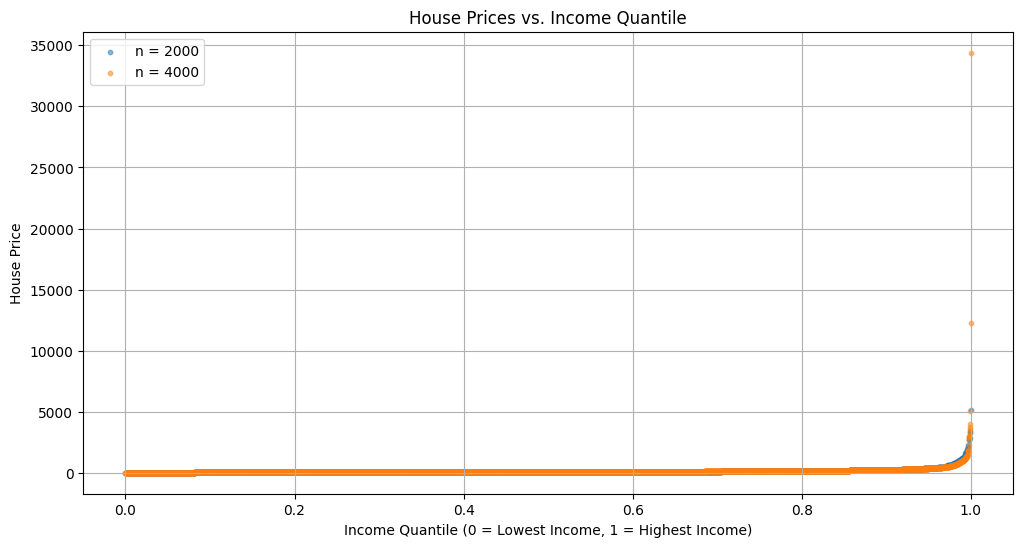

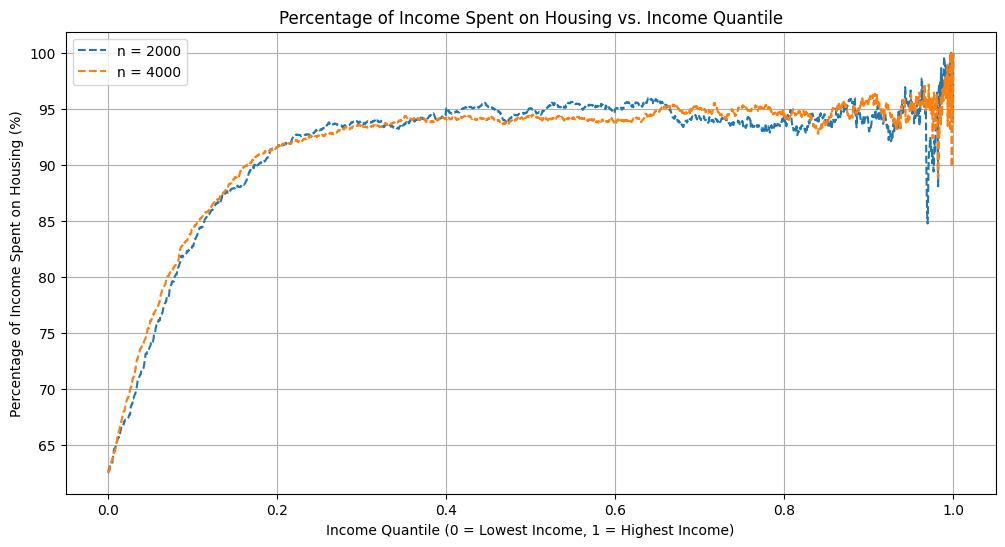

In [157]:
n_list = [2000, 4000]
alpha = 1.75
y_min = 80
mu = 10
c = 50
seed = 1

stats_list = []  # Store stats for table
all_y = []        # Store income data
all_prices = []   # Store prices


for n in n_list:

    y, d = gen_data(n, y_min, alpha, mu, c)
    prices = calc_prices_iterative(n, c, y, d) # the regular recursive approach does not work with n=4000
    all_y.append(y)
    all_prices.append(prices)
    
    # Compute statistics
    stats_i = compute_statistics(prices)
    stats_i['n'] = n  
    stats_list.append(stats_i)

# Create a DataFrame for statistics
stats_df = pd.DataFrame(stats_list)
stats_df = stats_df[['n', 'average', 'median', 'Q1', 'Q3', 'IQR']]
print(stats_df)

# Create plots after the loop

# First Plot: House Prices vs Income Quantile
plt.figure(figsize=(12, 6))
for prices, n in zip(all_prices, n_list):
    income_quantiles = np.linspace(0, 1, len(prices))
    plt.scatter(income_quantiles, prices, s=10, alpha=0.5, label=f'n = {n}')
plt.xlabel('Income Quantile (0 = Lowest Income, 1 = Highest Income)')
plt.ylabel('House Price')
plt.title('House Prices vs. Income Quantile')
plt.grid(True)
plt.legend()
plt.show()

# Second Plot: Percentage of Income Spent
plt.figure(figsize=(12, 6))
for y, prices, n in zip(all_y, all_prices, n_list):
    income_quantiles = np.linspace(0, 1, len(prices))
    percentage_spent = np.where(y != 0, (prices / y) * 100, 0)
    plt.plot(income_quantiles, percentage_spent, linestyle='--', label=f'n = {n}')
plt.xlabel('Income Quantile (0 = Lowest Income, 1 = Highest Income)')
plt.ylabel('Percentage of Income Spent on Housing (%)')
plt.title('Percentage of Income Spent on Housing vs. Income Quantile')
plt.grid(True)
plt.legend()
plt.show()


## 2b


## Running DocTest tests

This last step gets the DocTest system to check test cases in the documentation comments.
In this course, you won't need to modify the stuff below, or even understand the details.

In [158]:
import doctest
result = doctest.testmod(verbose=False)
if result[0] == 0:
    print(("Congratulations! You have passed all "+str(result[1])+" tests"))
else:
    print("Rats!")

Congratulations! You have passed all 0 tests
